# Import

In [3]:
# 기본 세팅
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde
from matplotlib import colors as mpl_colors
import os
import argparse
from datetime import datetime
from glob import glob


# Font & Color

##### TODO
- font download

In [4]:
# font = {'family': 'Tahoma'}
# font = {'family': 'Times New Roman'}

# plt.rc('font', **font)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
grid_color = 'gainsboro'

### Save format

In [5]:
save_formats = ['png', 'pdf', 'svg']
device = 'nano'
models = ['densenet201']
for model in models:
    for save_format in save_formats:
        directory_path = f'./{model}/{save_format}'
        if not os.path.exists(directory_path):
            os.makedirs(directory_path)
            print(f"디렉터리 '{directory_path}' 생성 완료!")
        else:
            print(f"디렉터리 '{directory_path}'가 이미 존재합니다.")

디렉터리 './densenet201/png' 생성 완료!
디렉터리 './densenet201/pdf' 생성 완료!
디렉터리 './densenet201/svg' 생성 완료!
디렉터리 './resnet10/png' 생성 완료!
디렉터리 './resnet10/pdf' 생성 완료!
디렉터리 './resnet10/svg' 생성 완료!


### Model information

In [1]:
def LayerNum(model):
    if model == "densenet201" :
        return 306
    elif model == "resnet152" :
        return 206
    elif model == "enetb0" :
        return 136
    elif model == "csmobilenet-v2" :
        return 81
    elif model == "squeezenet" :
        return 50
    elif model == "yolov7" :
        return 143
    elif model == "yolov7-tiny" :
        return 99
    elif model == "yolov4" :
        return 162
    elif model == "yolov4-tiny" :
        return 38
    elif model == "resnet10" :
        return 17
    elif model == "yolov2-tiny" :
        return 16
    else :
        print("Unknown model: ", model)
        return 0

# Load csv & Dataframe 생성

In [6]:
max_cores = 4
model = 'densenet201'
date = 'data-0107'

In [7]:
gpu_file_path = f"../../csv/{date}/layer_time/{model}/gpu_raw_data.csv"
gpu_data = pd.read_csv(gpu_file_path)

# 평균값을 저장할 배열
differences = []

# 각 layer에 대한 평균 계산
for i in range(LayerNum(model)):
    column_name = f"layer[{i}]"
    mean_value = gpu_data[column_name].mean()
    differences.append(mean_value)

print(len(differences))

306


In [8]:
# 파일 경로
cpu_file_path = f"../../csv/{date}/layer_time/{model}/cpu_raw_data_01blas.csv"
cpu_data = pd.read_csv(cpu_file_path)

# 평균값을 저장할 배열
layer_means = []
print(cpu_data.columns)
# 각 layer에 대한 평균 계산
for i in range(LayerNum(model)):
    column_name = f"layer[{i}]"
    mean_value = cpu_data[column_name].mean()
    layer_means.append(mean_value)

print(len(layer_means))
x_data = list(range(len(layer_means)))

acceleration_ratio = []
for i in range(LayerNum(model)):
    ratio = layer_means[i]/differences[i]
    acceleration_ratio.append(ratio)


Index(['start_preprocess', 'e_preprocess', 'end_preprocess', 'start_infer',
       'e_infer', 'end_infer', 'start_postprocess', 'e_postprocess',
       'end_postprocess', 'execution_time',
       ...
       'layer[296]', 'layer[297]', 'layer[298]', 'layer[299]', 'layer[300]',
       'layer[301]', 'layer[302]', 'layer[303]', 'layer[304]', 'layer[305]'],
      dtype='object', length=317)
306


# Graph

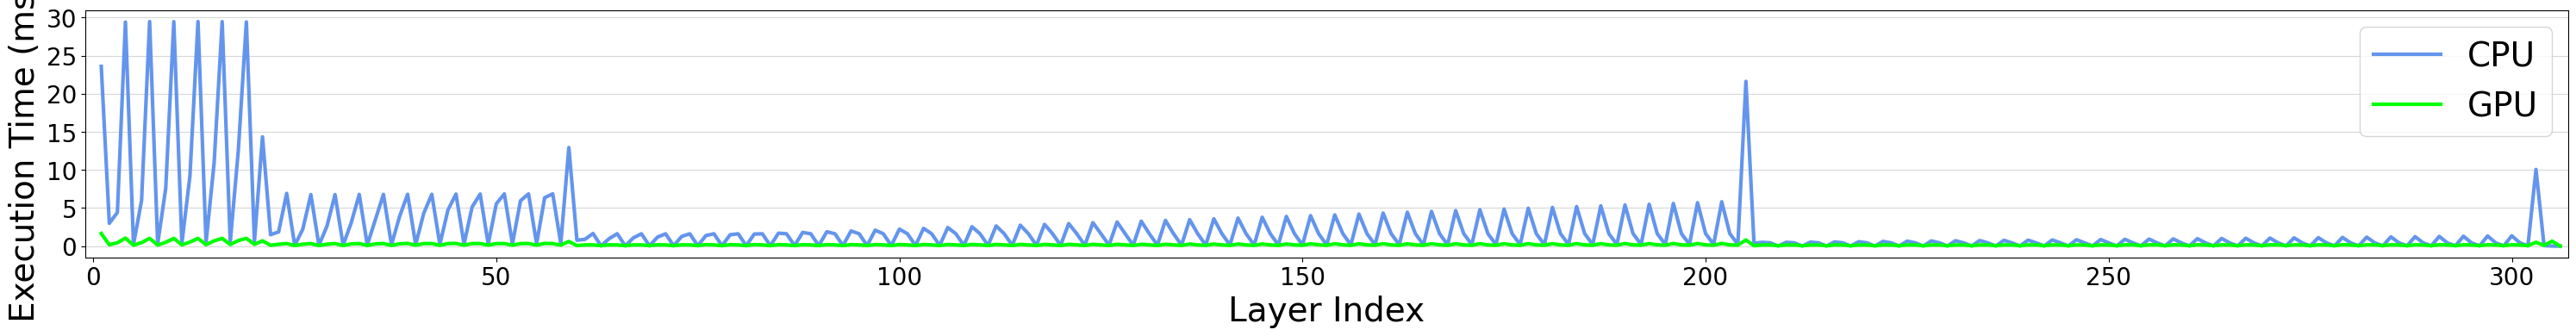

In [10]:
layer_array = list(range(1, len(layer_means) + 1)) 
fig, ax1 = plt.subplots(figsize=(30, 4))
ax1.plot(layer_array, layer_means, label='CPU', color = "cornflowerblue", linewidth=3)
ax1.plot(layer_array, differences, label='GPU', color = "lime", linewidth=3)
plt.xlim(-1, 307)
#plt.xticks(ticks=range(LayerNum(model)), labels=range(1, LayerNum(model) + 1), fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax1.set_xlabel('Layer Index', size=28)
ax1.set_ylabel('Execution Time (ms)   ', size=28)
#plt.title('Layer Means and Differences', size=15)
ax1.grid(True, axis='y', alpha = 0.5)
ax1.legend(fontsize=28, ncol=1, frameon=True)

plt.tight_layout()

for save_format in save_formats:
    plt.savefig(f'./{model}/{save_format}/8.LayerTime_{device}_{model}.{save_format}')